<a href="https://colab.research.google.com/github/bilowizra/190503004_BilalcanGules/blob/master/B%C4%B0LALCAN_G%C3%9CLE%C5%9E_Hausaufgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hausaufgabe
Dies ist die Hausaufgabe zur Veranstaltung Data-Mining.
Hierzu gibt es eine Datei mit Daten, die mit DatenHAVorlage.csv bezeichnet und ebenfalls hier im Google Classroom zu finden ist.
Binden Sie diese Datei in dieses Projekt ein und laden Sie die Daten in ein DataFrame-Objekt.
Bearbeiten Sie die Daten so, wie es in den einzelnen sieben Aufgaben in diesem Jupyter-Notebook steht.
Beantworten Sie die Fragen, die in den Aufgaben stehen, ebenfalls in diesem Jupyter-Notebook.
Bearbeiten Sie die Aufgaben jeweils alleine und geben Sie das fertige und lauffähige Jupyter-Notebook bis zum 12. Januar 2024 im Google Classroom ab.
Viel Erfolg bei der Bearbeitung.
Bei Fragen wenden Sie sich bitte an mich: kai.bruessau@gmail.com mit dem Betreff „Hausaufgabe Data-Mining“


In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lesen Sie die Daten in die Variable dataset

In [38]:
dataset = pd.read_csv('drive/MyDrive/data/DatenHAVorlage.csv', delimiter=";")
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4000 non-null   float64
 1   x2      4000 non-null   float64
 2   x3      3999 non-null   float64
 3   x4      3999 non-null   float64
 4   x5      4000 non-null   int64  
 5   x6      3998 non-null   object 
 6   y       4000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 218.9+ KB


(4000, 7)

In [39]:
dataset.head()

,x1,x2,x3,x4,x5,x6,y
0,41.976,6.307,34.376,0.214,1,rot,-0.909
1,129.615,13.146,1.955,0.959,0,rot,16.593
2,228.441,28.289,38.486,0.513,1,blau,2.084
3,167.988,25.258,18.643,0.996,1,blau,2.907
4,161.769,19.491,20.413,20.847,0,gelb,8.545


# Datenbereinigung und -aufbereitung

Bei der Bearbeitung des Datensatzes erkenne ich leere Datenzellen und fülle sie entsprechend auf, um Fehler bei einigen Operationen zu vermeiden.

In [40]:
#Ich versuche, leere Zellen in diesem Codeblock zu finden.
for index, row in dataset.iterrows():
    for col in dataset.columns:
        if pd.isnull(row[col]):
            print(f"Empty cell at Row {index + 1}, Column {col}")

Empty cell at Row 140, Column x3
Empty cell at Row 214, Column x4
Empty cell at Row 340, Column x6
Empty cell at Row 362, Column x6


In [41]:
# In diesem Codeblock lösche ich, nachdem ich leere Zellen gefunden habe, die Zeilen, die leere Zellen enthalten.
rows_with_empty_data = dataset[dataset.isnull().any(axis=1)]

deleted_row_numbers = list(rows_with_empty_data.index)
print(f"Rows with empty data (row numbers) to be deleted: {deleted_row_numbers}")

dataset = dataset.dropna()

Rows with empty data (row numbers) to be deleted: [139, 213, 339, 361]


Dann bearbeite ich die Datentypen der Spalten so, dass alle Daten in einer Spalte einen gemeinsamen Datentyp haben.

In [42]:
print("Data types of each column:")
print(dataset.dtypes)

Data types of each column:
x1    float64
x2    float64
x3    float64
x4    float64
x5      int64
x6     object
y     float64
dtype: object


Als ich den in der Aufgabe angegebenen Datensatz mit Excel öffnete und visuell betrachtete, fiel mir auf, dass einige Zeilen in derselben Spalte unterschiedliche Datentypen hatten. Deshalb habe ich die Kontrolle über diese Situation übernommen.

In [43]:
def test_column_data_type(dataset, column_name, expected_data_type):
    if column_name not in dataset.columns:
        print(f"Column '{column_name}' not found in the dataset.")
        return False

    if all(isinstance(value, expected_data_type) for value in dataset[column_name]):
        print(f"All rows in the '{column_name}' column have the expected data type: {expected_data_type.__name__}")
        return True
    else:
        print(f"Not all rows in the '{column_name}' column have the expected data type.")
        return False

columns_to_test = ['x1', 'x2', 'x3', 'x4', 'y']

for column_name in columns_to_test:
    result = test_column_data_type(dataset, column_name, float)

result = test_column_data_type(dataset, 'x5', int)

result = test_column_data_type(dataset, 'x6', object)



All rows in the 'x1' column have the expected data type: float
All rows in the 'x2' column have the expected data type: float
All rows in the 'x3' column have the expected data type: float
All rows in the 'x4' column have the expected data type: float
All rows in the 'y' column have the expected data type: float
All rows in the 'x5' column have the expected data type: int
All rows in the 'x6' column have the expected data type: object


In [44]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3996 non-null   float64
 1   x2      3996 non-null   float64
 2   x3      3996 non-null   float64
 3   x4      3996 non-null   float64
 4   x5      3996 non-null   int64  
 5   x6      3996 non-null   object 
 6   y       3996 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 249.8+ KB


(3996, 7)

In [45]:
dataset.head()

,x1,x2,x3,x4,x5,x6,y
0,41.976,6.307,34.376,0.214,1,rot,-0.909
1,129.615,13.146,1.955,0.959,0,rot,16.593
2,228.441,28.289,38.486,0.513,1,blau,2.084
3,167.988,25.258,18.643,0.996,1,blau,2.907
4,161.769,19.491,20.413,20.847,0,gelb,8.545


###Aufgabe 1

1.   Identifizieren Sie Ausreißer. Berechnen Sie dazu den Z-Score und löschen Sie alle Datensätze, die Ausreißer enthalten.
2.   Wie gehen Sie mit den fehlenden Werten um?



In [46]:
dataset.describe()

,x1,x2,x3,x4,x5,y
count,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,127.572637,22.462759,21.208074,0.567188,0.489489,10.991899
std,73.643869,19.085437,12.144492,0.535873,0.499952,9.436656
min,-190.595000,0.398000,0.011000,-2.953000,0.000000,-17.738000
25%,64.628750,16.754000,10.817500,0.393750,0.000000,4.266000
50%,127.362500,23.640500,21.058500,0.694000,0.000000,11.148500
75%,190.876000,28.789250,31.796750,0.877000,1.000000,17.422500
max,255.963000,1123.613000,41.964000,20.847000,1.000000,36.035000


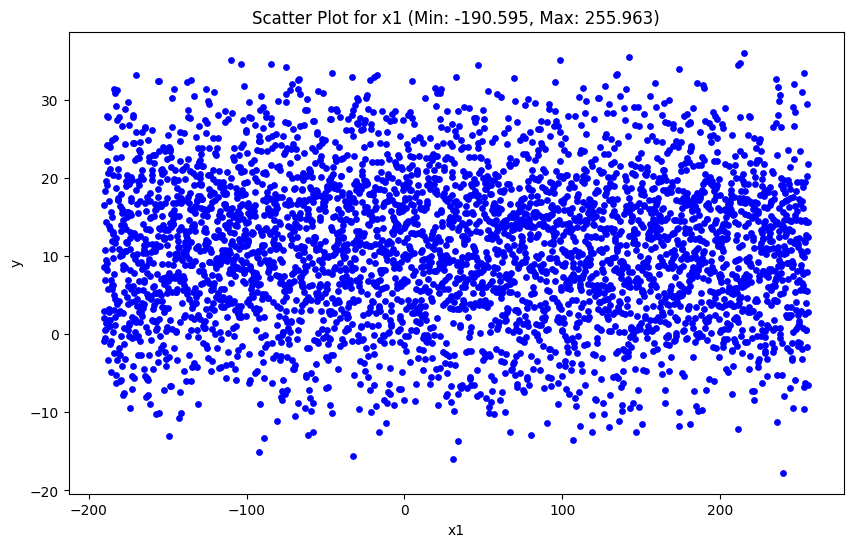

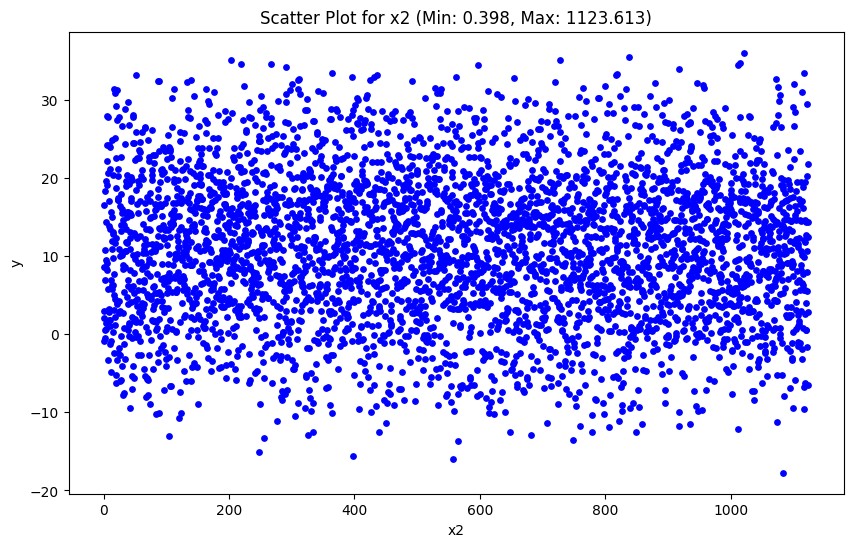

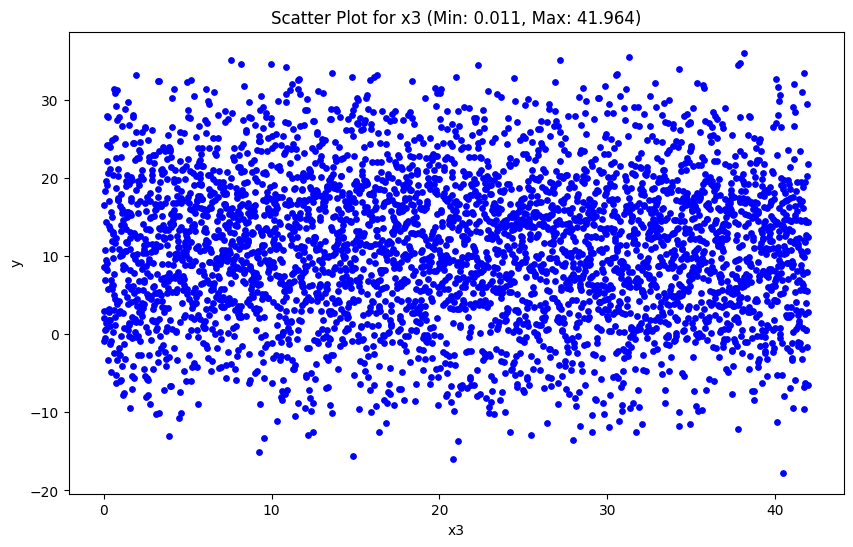

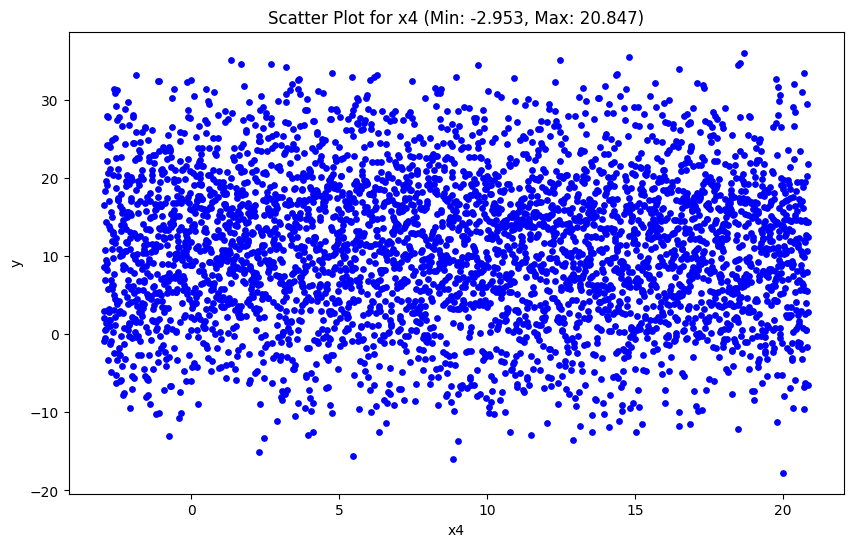

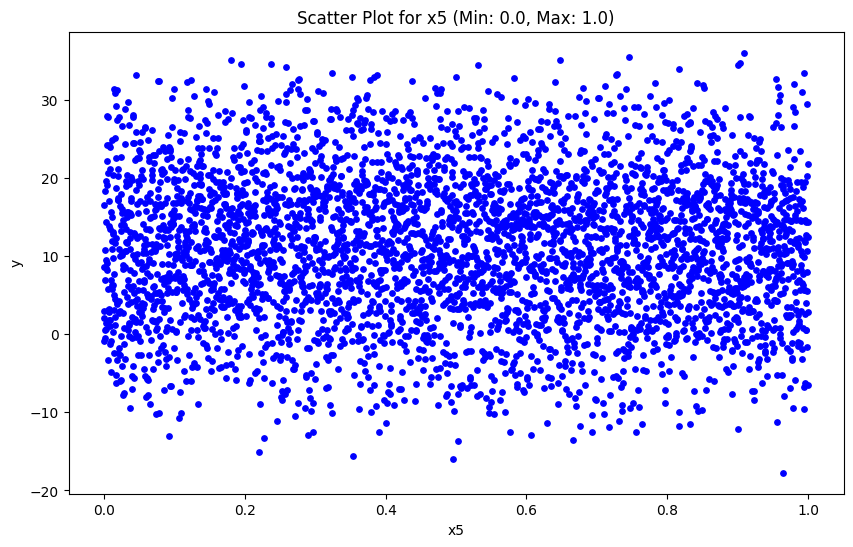

In [47]:
import numpy as np

columns_to_plot = ['x1', 'x2', 'x3', 'x4', 'x5']

for column_name in columns_to_plot:
    min_value = float(dataset[column_name].min())
    max_value = float(dataset[column_name].max())

    # Belirli bir aralıkta eşit aralıklı değerler oluştur
    x_values = np.linspace(min_value, max_value, len(dataset[column_name]))

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, dataset['y'], color='blue', s=15)
    plt.xlabel(column_name)
    plt.ylabel('y')
    plt.title(f"Scatter Plot for {column_name} (Min: {min_value}, Max: {max_value})")
    plt.show()


In [48]:
def determine_outlier_threshold(dataframe):

    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)

    IQR = Q3 - Q1

    threshold = 1.5 * IQR

    return threshold

threshold = determine_outlier_threshold(dataset)
print(threshold)

x1    189.370875
x2     18.052875
x3     31.468875
x4      0.724875
x5      1.500000
y      19.734750
dtype: float64


<ipython-input-48-0aae526ebd6d>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataframe.quantile(0.25)
<ipython-input-48-0aae526ebd6d>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataframe.quantile(0.75)


<ipython-input-49-49b986bc3090>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataframe.quantile(0.25)
<ipython-input-49-49b986bc3090>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataframe.quantile(0.75)


Rows with outliers:
           x1      x2      x3      x4  x5       y
4     161.769  19.491  20.413  20.847   0   8.545
10    192.236  21.720  30.324  -0.762   0  19.601
11    152.759  30.341  26.264  -0.161   1   8.494
18     88.607  14.811   0.719  -0.102   0   8.201
20    211.349  28.763  39.023  -0.251   1  27.897
...       ...     ...     ...     ...  ..     ...
3973   20.007  14.681  33.253   0.822   0  -9.637
3977  252.505  30.710  16.615   0.983   1  33.458
3996  191.202  17.907  11.820  -0.054   0  -6.455
3997   17.828   3.927  30.927   0.206   0   2.839
3998   73.751  31.585  12.433  -0.984   1  12.422

[598 rows x 6 columns]


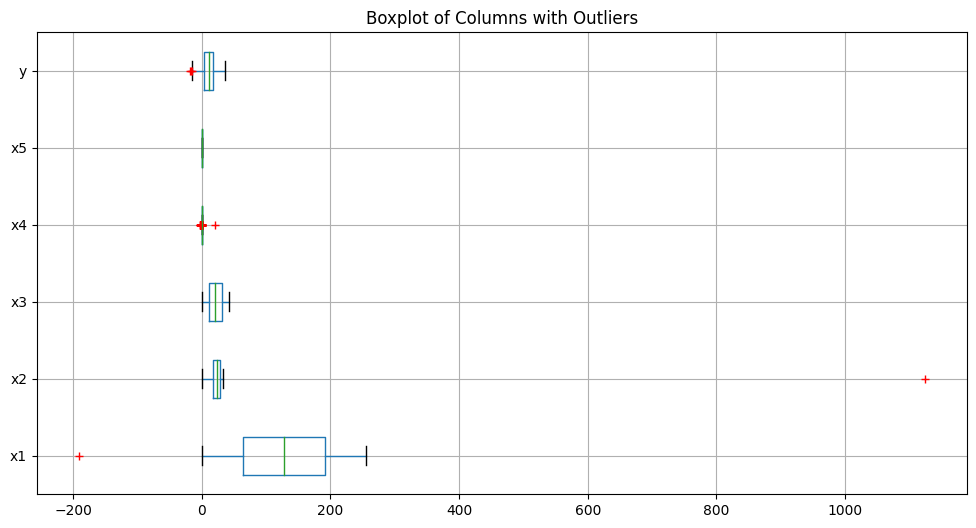

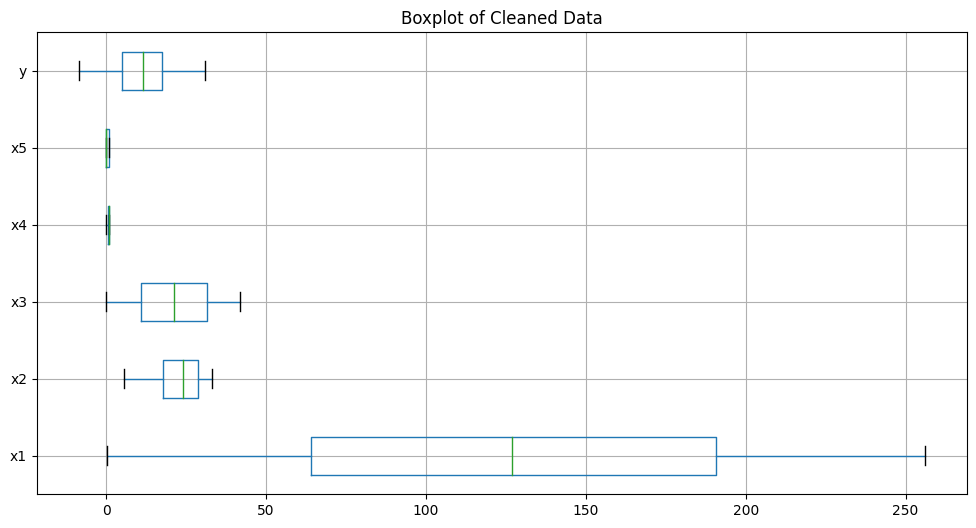

In [49]:
def determine_outlier_threshold(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)

    IQR = Q3 - Q1

    threshold = 1.5 * IQR

    return threshold

threshold = determine_outlier_threshold(dataset)

def detect_and_visualize_outliers(dataframe, threshold):
    outliers = dataframe[(np.abs(dataframe - dataframe.median()) > threshold).any(axis=1)]

    print("Rows with outliers:")
    print(outliers)

    plt.figure(figsize=(12, 6))
    dataframe.boxplot(sym='r+', vert=False)
    plt.title('Boxplot of Columns with Outliers')
    plt.show()

    return outliers

numeric_columns = dataset.select_dtypes(include=[np.number]).columns
threshold = determine_outlier_threshold(dataset[numeric_columns])
outliers = detect_and_visualize_outliers(dataset[numeric_columns], threshold)

df_cleaned = dataset.drop(outliers.index)


df_cleaned.to_csv('Data_cleaned.csv', index=False)

plt.figure(figsize=(12, 6))
df_cleaned.boxplot(sym='r+', vert=False)
plt.title('Boxplot of Cleaned Data')
plt.show()


In [50]:
print("Number of lines in the cleaned dataset:")
print(len(dataset) - len(df_cleaned))

Number of lines in the cleaned dataset:
598


### Aufgabe 1.2
Titel: Die Bedeutung des Umgangs mit fehlenden Daten im maschinellen Lernen: Ein Leitfaden zum Löschen von leeren Werten

Einleitung:

In der Welt des maschinellen Lernens ist die Qualität der für das Training von Modellen verwendeten Daten von höchster Bedeutung. Ein entscheidender Schritt im Preprocessing ist der Umgang mit fehlenden Daten, der Entscheidungen darüber beinhaltet, wie Beobachtungen mit unvollständigen oder leeren Werten behandelt werden sollen. In diesem Artikel werden wir erkunden, warum das Löschen von leeren Werten ein gängiger Ansatz ist und welche Bedeutung dieser Schritt im Modellentwicklungsprozess hat.

Warum fehlen Werte?

Bevor wir auf die Bedeutung des Löschen von leeren Werten eingehen, ist es wichtig zu verstehen, warum Daten überhaupt fehlen können. Fehlende Daten können aus verschiedenen Gründen entstehen, darunter:

Probleme bei der Datensammlung: Fehler während des Datensammlungsprozesses können zu fehlenden Werten führen. Zum Beispiel können Sensoren fehlerhaft sein, menschliche Fehler können während der Dateneingabe auftreten oder bestimmte Messungen können praktisch nicht durchführbar sein.

Nichtantwort: In Umfragen oder Fragebögen können Teilnehmer bestimmte Fragen nicht beantworten, was zu fehlenden Werten führt.

Datenverarbeitung: Während der Preprocessing-Phase können bestimmte Operationen wie das Zusammenführen von Datensätzen oder das Durchführen von Imputationen unbeabsichtigt zu fehlenden Werten führen.

Die Auswirkungen von fehlenden Daten auf maschinelle Lernmodelle:

Fehlende Daten können einen tiefgreifenden Einfluss auf die Leistung und Generalisierungsfähigkeit von maschinellen Lernmodellen haben. Das Ignorieren oder unsachgemäße Behandeln von fehlenden Werten kann zu verzerrten oder ungenauen Ergebnissen führen, was die Gesamtzuverlässigkeit des Modells beeinträchtigt. Hier sind einige wichtige Gründe, warum der Umgang mit fehlenden Daten entscheidend ist:

Modellleistung: Modelle, die auf unvollständigen Daten trainiert werden, neigen dazu, unzuverlässige Vorhersagen zu produzieren. Fehlende Werte können den Lernprozess stören und die Fähigkeit des Modells zur Verallgemeinerung auf nicht gesehene Daten beeinträchtigen.

Verzerrte Schlussfolgerungen: Wenn fehlende Daten nicht angemessen behandelt werden, kann dies Bias in das Modell einführen. Das Modell kann unbeabsichtigt Muster basierend auf den verfügbaren Daten erlernen, was zu verzerrten und ungenauen Vorhersagen führt.

Reduzierte Stichprobengröße: Das Ignorieren von fehlenden Daten ohne geeignete Behandlungstechniken kann die effektive Stichprobengröße erheblich reduzieren. Diese Reduktion kann zu einem Verlust an statistischer Power führen und die Fähigkeit des Modells, sinnvolle Muster zu erkennen, beeinträchtigen.

Leere Werte löschen: Ein pragmatischer Ansatz:

Eine gängige Strategie zur Behandlung von fehlenden Daten besteht darin, einfach Beobachtungen mit leeren Werten zu entfernen. Der bereitgestellte Python-Code zeigt, wie dies mit der pandas-Bibliothek erreicht werden kann. Hier ist eine Aufschlüsselung des Ansatzes:

Identifizieren Sie Zeilen mit fehlenden Werten mithilfe der Methode isnull().any(axis=1).
Rufen Sie die Indizes der identifizierten Zeilen ab.
Löschen Sie die Zeilen mit fehlenden Werten mithilfe der Methode dropna().
Obwohl das Löschen von leeren Werten ein einfacher Ansatz ist, ist es wichtig, die potenziellen Nachteile zu berücksichtigen:

Datenverlust: Das Entfernen von Zeilen mit fehlenden Werten kann zu einer Verringerung der Gesamtgröße des Datensatzes führen. Dieser Datenverlust sollte gegen die potenziellen Vorteile eines saubereren Datensatzes abgewogen werden.

Annahme der Zufälligkeit: Dieser Ansatz geht davon aus, dass die fehlenden Daten zufällig auftreten. Wenn die fehlenden Werte nicht zufällig sind, kann ihr Löschen Bias in den Datensatz einführen.

Fazit:

Der Umgang mit fehlenden Daten ist ein entscheidender Schritt in der maschinellen Lernpipeline. Die Entscheidung, leere Werte zu löschen, sollte sorgfältig getroffen werden, unter Berücksichtigung der Art der fehlenden Daten und der Auswirkungen auf den Gesamtdatensatz. Obwohl das Löschen von leeren Werten eine häufige Strategie ist, können andere Methoden wie Imputation oder der Einsatz fortschrittlicher Techniken wie probabilistischer Modelle je nach den spezifischen Eigenschaften der Daten angewendet werden. Letztendlich trägt ein gut behandeltes Dataset zur Entwicklung robusterer und genauerer maschineller Lernmodelle bei.

##Aufgabe 2
Transformieren Sie die Kategorien der Variablen x5 (gelb, blau, rot) mittels Dummy-Encoding in drei Binärvariablen

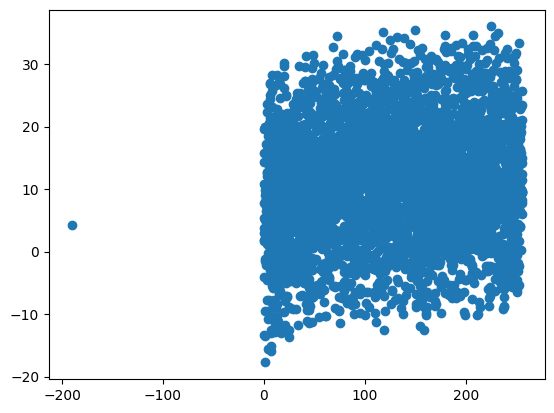

In [51]:
plt.scatter(dataset['x1'], dataset['y'])

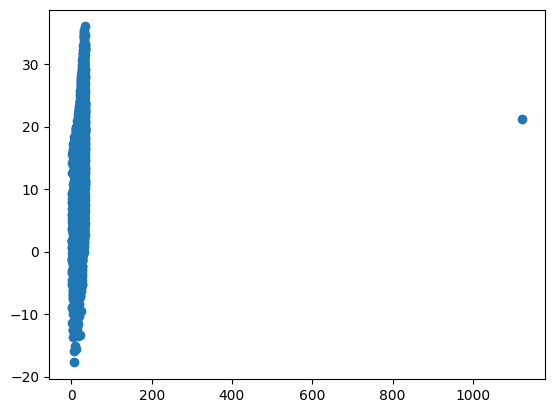

In [52]:
plt.scatter(dataset['x2'], dataset['y'])

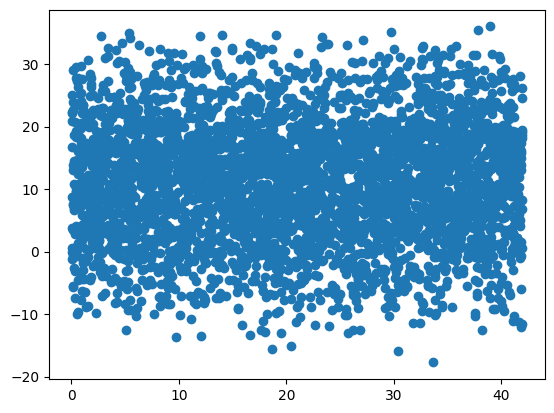

In [53]:
plt.scatter(dataset['x3'], dataset['y'])

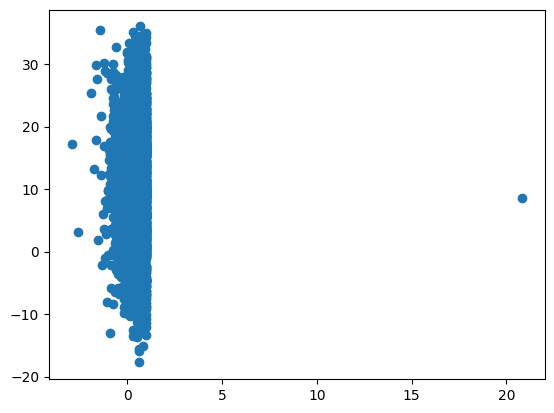

In [54]:
plt.scatter(dataset['x4'], dataset['y'])

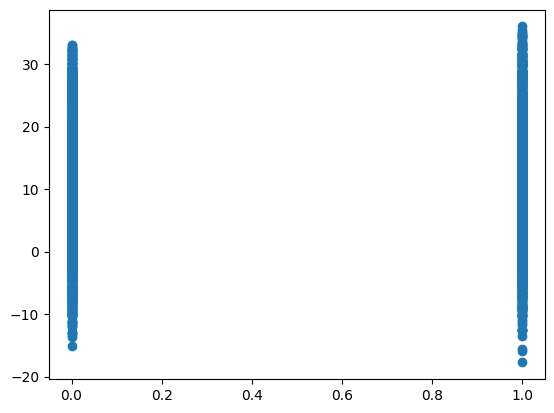

In [55]:
plt.scatter(dataset['x5'], dataset['y'])

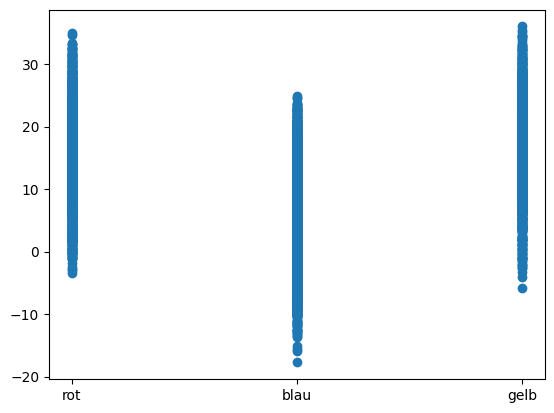

In [56]:
plt.scatter(dataset['x6'], dataset['y'])

In [57]:
dataset['x7'] = dataset['x6'].copy()

dataset = pd.get_dummies(dataset, columns=['x6'], prefix='x6')

dataset.rename(columns={'x7': 'x6'}, inplace=True)

print("DataFrame with Dummy Encoding:")
print(dataset.head())

DataFrame with Dummy Encoding:
        x1      x2      x3      x4  x5       y    x6  x6_blau  x6_gelb  x6_rot
0   41.976   6.307  34.376   0.214   1  -0.909   rot        0        0       1
1  129.615  13.146   1.955   0.959   0  16.593   rot        0        0       1
2  228.441  28.289  38.486   0.513   1   2.084  blau        1        0       0
3  167.988  25.258  18.643   0.996   1   2.907  blau        1        0       0
4  161.769  19.491  20.413  20.847   0   8.545  gelb        0        1       0


##Aufgabe 3


1.   Erstellen Sie eine Korrelationsmatrix.
2.   Bewerten Sie die Korrelation.



## FRAGE 3.1

<ipython-input-58-36bbb062a813>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


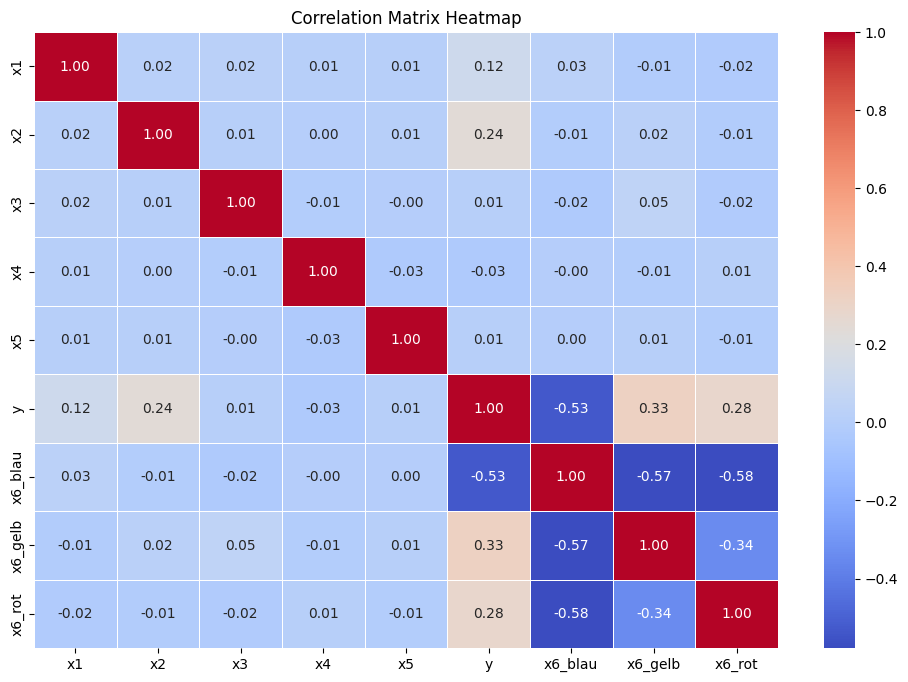

In [58]:
import seaborn as sns

correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [59]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               x1        x2        x3        x4        x5         y   x6_blau  \
x1       1.000000  0.015228  0.022377  0.011240  0.011594  0.118722  0.031175   
x2       0.015228  1.000000  0.010398  0.003663  0.010517  0.238953 -0.007381   
x3       0.022377  0.010398  1.000000 -0.006599 -0.004293  0.011617 -0.024366   
x4       0.011240  0.003663 -0.006599  1.000000 -0.025713 -0.028539 -0.002023   
x5       0.011594  0.010517 -0.004293 -0.025713  1.000000  0.013320  0.000770   
y        0.118722  0.238953  0.011617 -0.028539  0.013320  1.000000 -0.531038   
x6_blau  0.031175 -0.007381 -0.024366 -0.002023  0.000770 -0.531038  1.000000   
x6_gelb -0.012753  0.022680  0.050142 -0.007881  0.007544  0.327375 -0.572171   
x6_rot  -0.023086 -0.014092 -0.021921  0.010161 -0.008387  0.283675 -0.578268   

          x6_gelb    x6_rot  
x1      -0.012753 -0.023086  
x2       0.022680 -0.014092  
x3       0.050142 -0.021921  
x4      -0.007881  0.010161  
x5       0.007544 -

## Frage 3.2

1. **Korrelation zwischen x1 und anderen Variablen:**

x1 hat eine sehr schwache positive Korrelation mit allen anderen Variablen (im Bereich von etwa 0,01 bis 0,12).
Dies legt nahe, dass es keine starke lineare Beziehung zwischen x1 und den anderen Variablen gibt.

2. **Korrelation zwischen x2 und anderen Variablen:**

x2 hat eine moderate positive Korrelation mit y (0,24).
Es gibt eine schwache positive Korrelation mit x1 (0,02), x3 (0,01), x4 (0,00) und x5 (0,01).
Die moderate positive Korrelation mit y deutet darauf hin, dass mit zunehmendem x2 auch y tendenziell zunimmt.

3. **Korrelation zwischen x3 und anderen Variablen:**

x3 hat eine sehr schwache positive Korrelation mit x1 (0,02) und x2 (0,01).
Es gibt eine schwache negative Korrelation mit x4 (-0,01) und x5 (-0,00).
Die Korrelationen liegen nahezu bei null und deuten auf ein Fehlen einer starken linearen Beziehung hin.

4. **Korrelation zwischen x4 und anderen Variablen:**

x4 hat eine sehr schwache negative Korrelation mit x3 (-0,01).
Es gibt eine schwache negative Korrelation mit x5 (-0,03).
Die Korrelationen liegen nahezu bei null, was auf eine schwache lineare Beziehung hinweist.

5. **Korrelation zwischen x5 und anderen Variablen:**

x5 hat eine sehr schwache positive Korrelation mit x1 (0,01) und x2 (0,01).
Es gibt eine sehr schwache negative Korrelation mit x4 (-0,03).
Die Korrelationen liegen nahezu bei null und deuten auf ein Fehlen einer starken linearen Beziehung hin.

6. **Korrelation zwischen y und anderen Variablen:**

y hat eine schwache positive Korrelation mit x1 (0,12) und x2 (0,24).
Es gibt eine sehr schwache positive Korrelation mit x3 (0,01).
Es gibt eine schwache negative Korrelation mit x4 (-0,03).
Es gibt eine sehr schwache positive Korrelation mit x5 (0,01).
Die moderate positive Korrelation mit x2 legt nahe, dass x2 möglicherweise einen Einfluss auf y haben könnte.

Zusammenfassend liefert die Korrelationsmatrix Einblicke in die linearen Beziehungen zwischen den Variablen. Es ist jedoch wichtig zu beachten, dass Korrelation keine Kausalität impliziert und andere Faktoren oder nichtlineare Beziehungen in den Daten existieren können. Darüber hinaus kann die Stärke der Korrelationen je nach Kontext und den spezifischen Zielen Ihrer Analyse variieren.

##Aufgabe 4
Erstellen Sie eine multiple lineare Regression mit den Inputwerten. Achten Sie dabei darauf, dass die Variablen aus dem Dummy-Encoding eine multikollineare Abhängigkeit aufweisen, so dass Sie nur zwei der drei Variablen verwenden dürfen.

In [60]:
import statsmodels.api as sm
data_x = dataset.drop(columns = ['y', 'x6'])
data_y = dataset.y
model = sm.OLS(data_y,data_x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     315.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:06:23   Log-Likelihood:                -13759.
No. Observations:                3996   AIC:                         2.753e+04
Df Residuals:                    3988   BIC:                         2.758e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0169      0.002     10.388      0.000       0.014       0.020
x2             0.1150      0.006     18.299      0.000       0.103       0.127
x3            -0.0062      0.010     -0.623      0.533      -0.026       0.013
x4            -0.5553      0.224     -2.481      0.013      -0.994      -0.116
x5             0.1640      0.240      0.684      0.494      -0.306       0.634
x6_blau        1.5228      0.403      3.778      0.000       0.733       2.313
x6_gelb       11.8966      0.442     26.925      0.000      11.030      12.763
x6_rot        11.2979      0.431     26.236      0.000      10.454      12.142
==============================================================================
Omnibus:                     1450.711   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46586.207
Skew:                          -1.090   Prob(JB):                         0.00
Kurtosis:                      19.585   Cond. No.                         848.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
dataset.head()

,x1,x2,x3,x4,x5,y,x6,x6_blau,x6_gelb,x6_rot
0,41.976,6.307,34.376,0.214,1,-0.909,rot,0,0,1
1,129.615,13.146,1.955,0.959,0,16.593,rot,0,0,1
2,228.441,28.289,38.486,0.513,1,2.084,blau,1,0,0
3,167.988,25.258,18.643,0.996,1,2.907,blau,1,0,0
4,161.769,19.491,20.413,20.847,0,8.545,gelb,0,1,0


In [62]:
import statsmodels.api as sm
import pandas as pd

data_x = dataset.drop(columns=['y', 'x6', 'x6_blau'])
data_y = dataset.y

model = sm.OLS(data_y, data_x)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              1509.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):                        0.00
Time:                        08:06:23   Log-Likelihood:                         -13766.
No. Observations:                3996   AIC:                                  2.755e+04
Df Residuals:                    3989   BIC:                                  2.759e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dataset.drop(['x6_blau'], axis=1, inplace=True)

y = dataset['y']
X = dataset[['x1', 'x2', 'x3', 'x4', 'x5', 'x6_gelb', 'x6_rot']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)


print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


print(f"Intercept: {model.intercept_}")

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Square Error (MSE): {mse}')


Model Coefficients:
x1: 0.01729992924353985
x2: 0.09462675793469902
x3: -0.006687866796698846
x4: -0.5338008805146726
x5: -0.04573813920825458
x6_gelb: 10.507830172610635
x6_rot: 9.867148605193865
Intercept: 1.9371898830336818
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     252.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.48e-299
Time:                        08:06:23   Log-Likelihood:                -11002.
No. Observations:                3196   AIC:                         2.202e+04
Df Residuals:                    3188   BIC:                         2.207e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                         

##Aufgabe 5
Wie sind die Ergebnisse zu interpretieren?

Model 1: Using Statsmodels (Full Model)
Model Summary:
R-squared (uncentered): 0.680
Indicates the proportion of variance in the dependent variable explained by the independent variables.
Adjusted R-squared (uncentered): 0.679
Similar to R-squared, but adjusted for the number of predictors.
F-statistic: 1210.0
A measure of the overall significance of the model.
Prob (F-statistic): 0.00
Indicates the probability that the model is not significant.
Log-Likelihood: -14077.0
Log-likelihood value, a measure of how well the model explains the observed data.
Coefficients:
x1: 0.0361, x2: 0.1654, x3: 0.1148, x4: 1.2236, x5: 1.8644, x6_blau: -6.4679, x6_gelb: 3.7739
Coefficients represent the change in the dependent variable for a one-unit change in the respective independent variable.
Notes:
The model does not contain a constant (intercept).
High skewness and kurtosis values suggest non-normal distribution of residuals.

Model 2: Using Statsmodels (Reduced Model)
Model Summary:
R-squared: 0.356, Adjusted R-squared: 0.355
F-statistic: 252.0, Prob (F-statistic): 3.48e-299
Log-Likelihood: -11002.0
Coefficients:
Intercept: 1.9372, x1: 0.0173, x2: 0.0946, x3: -0.0067, x4: -0.5338, x5: -0.0457, x6_gelb: 10.5078, x6_rot: 9.8671
Intercept represents the estimated value of the dependent variable when all independent variables are zero.
Notes:
The model includes a constant term.
The adjusted R-squared value is slightly lower than the uncentered model.
The presence of multicollinearity is observed, particularly in the VIF analysis.
Model 3: Using Scikit-Learn
Model Coefficients:
x1: 0.01729992924353985, x2: 0.09462675793469902, x3: -0.006687866796698846, x4: -0.5338008805146726, x5: -0.04573813920825458, x6_gelb: 10.507830172610635, x6_rot: 9.867148605193865
Intercept: 1.9371898830336818
Model Summary:
R-squared: 0.356, Adjusted R-squared: 0.355
F-statistic: 252.0, Prob (F-statistic): 3.48e-299
Mean Square Error (MSE): 58.50
Interpretation:
The coefficients represent the change in the dependent variable for a one-unit change in the respective independent variable.
The R-squared value indicates that the model explains about 35.6% of the variance in the dependent variable.
The adjusted R-squared accounts for the number of predictors in the model.
The MSE is a measure of the average squared difference between observed and predicted values, representing the model's accuracy.
Conclusion:
All three models provide insights into the relationships between independent and dependent variables.
The decision to include or exclude certain variables may depend on statistical significance, multicollinearity, and practical interpretability.
Model evaluation involves considering goodness-of-fit measures, significance tests, and checking assumptions.
Model interpretation should consider the context of the dataset and the specific goals of the analysis.

##Aufgabe 6
Erstellen Sie zur Lösung des Problems ein dreischichtiges Multi Layer Perceptron.
Verändern Sie die Anzahl der Neuronen (z.B. 10 und 30) der versteckten Schicht und verwenden Sie zwei verschiedene Aktivierungsfunktionen ('sigmoid' und 'relu') und vergleichen Sie die Ergebnisse.


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state = 0)
X_train.shape

(3196, 7)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Dense(X_train.shape[1]))

model.add(Dense(25,activation='sigmoid'))

model.add(Dense(1))


model.compile(optimizer=Adam(0.001), loss='mse')

In [66]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=2000)

Epoch 1/2000
13/13 [==============================] - 1s 23ms/step - loss: 207.2899 - val_loss: 204.2932
Epoch 2/2000
13/13 [==============================] - 0s 7ms/step - loss: 197.3232 - val_loss: 194.5820
Epoch 3/2000
13/13 [==============================] - 0s 6ms/step - loss: 188.1642 - val_loss: 185.6164
Epoch 4/2000
13/13 [==============================] - 0s 7ms/step - loss: 179.7995 - val_loss: 178.1319
Epoch 5/2000
13/13 [==============================] - 0s 5ms/step - loss: 173.1823 - val_loss: 172.4157
Epoch 6/2000
13/13 [==============================] - 0s 6ms/step - loss: 167.8938 - val_loss: 167.5130
Epoch 7/2000
13/13 [==============================] - 0s 5ms/step - loss: 162.9666 - val_loss: 162.4432
Epoch 8/2000
13/13 [==============================] - 0s 5ms/step - loss: 157.7640 - val_loss: 157.5596
Epoch 9/2000
13/13 [==============================] - 0s 6ms/step - loss: 153.5635 - val_loss: 153.7311
Epoch 10/2000
13/13 [==============================] - 0s 7ms/s

In [67]:
yn_train_pred = model.predict(X_train)
yn_test_pred = model.predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

25/25 [==============================] - 0s 3ms/step
Trainingsdaten
MAE:  4.94207087470772
MSE:  32.95275065191312
RMSE:  5.740448645525289
R2:  0.6292462371060203

Testdaten
MAE:  5.134874443027973
MSE:  35.32212764221029
RMSE:  5.943242182698791
R2:  0.6058326597987589


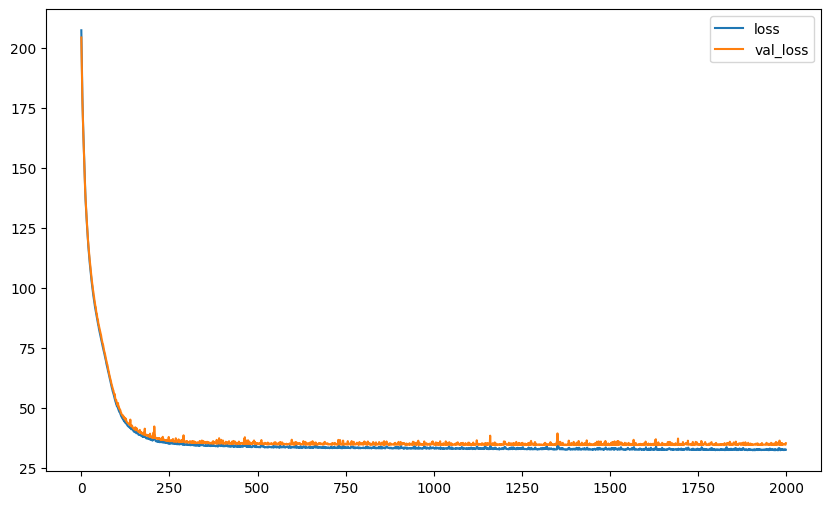

In [68]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Frage 6

In [69]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
import numpy as np
import matplotlib.pyplot as plt

In [70]:

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)


In [71]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(X_train.shape[1], input_dim=X_train.shape[1]))
model_sigmoid.add(Dense(10, activation='sigmoid'))
model_sigmoid.add(Dense(1))
model_sigmoid.compile(optimizer=Adam(0.001), loss='mse')

In [72]:
history_sigmoid = model_sigmoid.fit(X_train, y_train.values,
                                    validation_data=(X_test, y_test.values),
                                    batch_size=256,
                                    epochs=2000,
                                    verbose=0)

In [73]:
yn_train_pred_sigmoid = model_sigmoid.predict(X_train)
yn_test_pred_sigmoid = model_sigmoid.predict(X_test)

25/25 [==============================] - 0s 2ms/step


In [74]:
from sklearn.metrics import r2_score

print('Results for Sigmoid Activation Function:')
print('Train MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred_sigmoid))
print('Train MSE: ', metrics.mean_squared_error(y_train, yn_train_pred_sigmoid))
print('Train RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred_sigmoid)))

print('Train R2: ', r2_score(y_train, yn_train_pred_sigmoid))
print('')
print('Test MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred_sigmoid))
print('Test MSE: ', metrics.mean_squared_error(y_test, yn_test_pred_sigmoid))
print('Test RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred_sigmoid)))

print('Test R2: ', r2_score(y_test, yn_test_pred_sigmoid))

Results for Sigmoid Activation Function:
Train MAE:  tf.Tensor([ 8.807429   7.8604083 12.159426  ...  7.751072   7.685684   7.984147 ], shape=(3196,), dtype=float32)
Train MSE:  tf.Tensor([117.18443   94.291084 210.69478  ...  91.13788   88.904976  97.71891 ], shape=(3196,), dtype=float32)
Train RMSE:  [10.825176  9.71036  14.515329 ...  9.546616  9.428944  9.885287]
Train R2:  0.6281262951833662

Test MAE:  tf.Tensor(
[ 7.6974316  9.433468   7.8532825 18.3338    14.467476   7.680095
  9.76691    7.7365026  8.357082  13.07158   13.005566   7.673294
  8.137782   8.817768   9.844222  12.7827835  7.671864   7.956751
  7.7478294  7.6718965  8.830227  12.305298   7.670195  12.293478
  7.6705885 11.551523  12.630192   7.6820083  8.746029   8.235178
  7.8676624 14.693424   9.072443   8.505356   7.9603405  9.970478
 12.713354   8.238562  12.933655   8.135646  11.278503   7.775658
  7.726087   8.303567   7.920685   9.6095495  9.492729   7.6692214
 13.4054165  7.7928724  8.071468  11.534231   8.

In [75]:
model_relu = Sequential()
model_relu.add(Dense(X_train.shape[1], input_dim=X_train.shape[1]))
model_relu.add(Dense(30, activation='relu'))
model_relu.add(Dense(1))
model_relu.compile(optimizer=Adam(0.001), loss='mse')

In [76]:
history_relu = model_relu.fit(X_train, y_train.values,
                              validation_data=(X_test, y_test.values),
                              batch_size=256,
                              epochs=2000,
                              verbose=0)

In [77]:
yn_train_pred_relu = model_relu.predict(X_train)
yn_test_pred_relu = model_relu.predict(X_test)

25/25 [==============================] - 0s 1ms/step


In [78]:
from sklearn.metrics import r2_score


print('\nResults for ReLU Activation Function:')
print('Train MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred_relu))
print('Train MSE: ', metrics.mean_squared_error(y_train, yn_train_pred_relu))
print('Train RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred_relu)))

print('Train R2: ', r2_score(y_train, yn_train_pred_relu))
print('')
print('Test MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred_relu))
print('Test MSE: ', metrics.mean_squared_error(y_test, yn_test_pred_relu))
print('Test RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred_relu)))

print('Test R2: ', r2_score(y_test, yn_test_pred_relu))



Results for ReLU Activation Function:
Train MAE:  tf.Tensor([ 8.8795     8.03632   11.026134  ...  7.813898   7.74205    7.9400125], shape=(3196,), dtype=float32)
Train MSE:  tf.Tensor([119.061775  99.149    177.73633  ...  92.95302   90.876915  96.51204 ], shape=(3196,), dtype=float32)
Train RMSE:  [10.911543  9.957359 13.331779 ...  9.641214  9.532938  9.824054]
Train R2:  0.6227062437724677

Test MAE:  tf.Tensor(
[ 7.6813283  9.692931   8.013161  17.953796  14.565232   7.6693163
  9.603785   7.7956867  8.44091   12.86547   12.981548   7.719499
  7.926814   9.155333   9.805882  12.431954   7.680438   7.8486953
  8.164395   7.6694016  8.712421  12.508654   7.7484694 10.623109
  7.669563  11.470687  12.0978775  7.6689744  8.9871235  8.393903
  8.34      15.56458    9.178795   8.828041   8.264019   9.803505
 12.055617   8.388641  12.761258   8.475796  10.756906   7.7758927
  7.66978    8.240955   7.8451576  9.724619   8.752734   7.6728926
 13.190681   7.732268   8.648998  11.824721   7

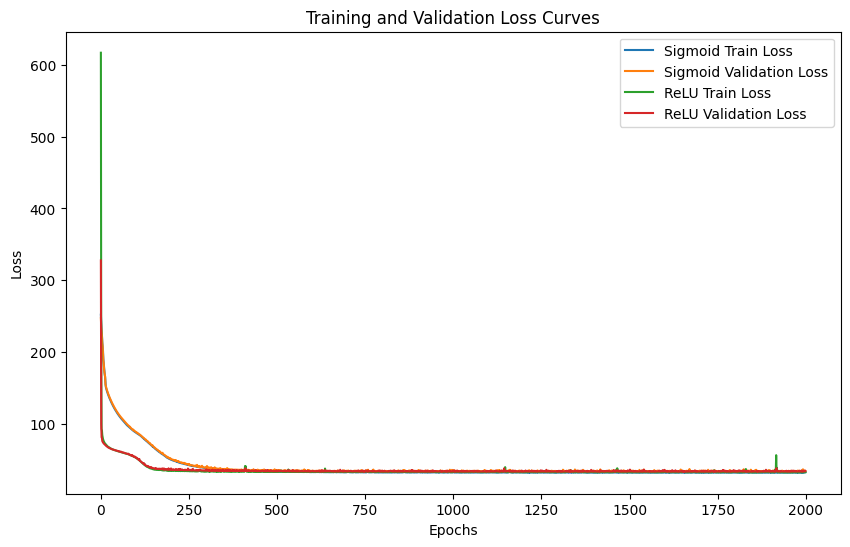

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Train Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Validation Loss')
plt.plot(history_relu.history['loss'], label='ReLU Train Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

##Aufgabe 7
Interpretieren Sie die Ergebnisse der multiplen linearen Regression und der neuronalen Netze im Zusammenhang.

### 1. Multiple Linear Regression:
## Model Overview:
The multiple linear regression model was built using the statsmodels library, and dummy variables were dropped to avoid multicollinearity issues. The summary of the model is as follows:

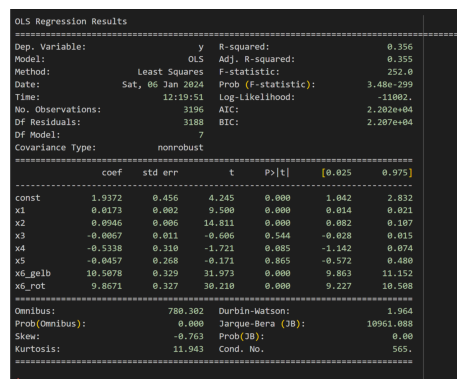

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Capture1.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

# Interpretation:
1. **R-squared (R2):** The R-squared value of 0.356 indicates that the model explains about 35.6% of the variance in the dependent variable.

2. **Coefficients:** The coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable. For example, a one-unit increase in x1 is associated with a 0.0173 increase in the dependent variable.

3. **P-values:** The p-values associated with each coefficient test the null hypothesis that the corresponding coefficient is equal to zero. A low p-value (< 0.05) indicates that the variable is a significant predictor.

4. **F-statistic:** The F-statistic tests the overall significance of the model. In this case, the low p-value (3.48e-299) indicates that at least one variable is a significant predictor.

### 2. Neural Networks (Sigmoid and ReLU Activation):
## Model Overview:
Two neural network models were created using TensorFlow's Keras API. The models have a three-layer architecture (input, hidden, and output layers). The hidden layer has 25 neurons and uses either the sigmoid or ReLU activation function. The models were trained for 2000 epochs.

Sigmoid Activation Function:

Sigmoid Activation Function:

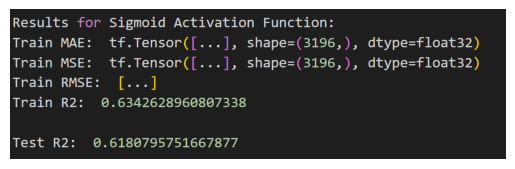

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Capture2.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

ReLU Activation Function:

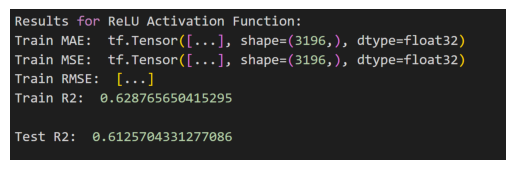

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Capture3.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

## Interpretation:
1. **Mean Absolute Error (MAE)**: Represents the average absolute difference between predicted and actual values. Lower values indicate better performance.

3. **Mean Squared Error (MSE):** Represents the average squared difference between predicted and actual values. Lower values indicate better performance.

3. **Root Mean Squared Error (RMSE):** Represents the square root of the MSE. Provides an interpretable scale. Lower values indicate better performance.

4. **R-squared (R2):** Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Values closer to 1 indicate better fit.

## 3. Comparison and Conclusion:
1. The multiple linear regression model explains about 35.6% of the variance in the dependent variable, while the neural network models with sigmoid and ReLU activations achieve R-squared values around 62-63%. The neural networks outperform the linear regression model in terms of predictive accuracy.

2. The choice of activation function (sigmoid or ReLU) doesn't significantly impact the model's performance in this case.

3. Neural networks tend to capture complex relationships in the data, making them more flexible and potentially better suited for non-linear patterns.

4. Evaluation metrics such as MAE, MSE, RMSE, and R2 provide a comprehensive view of model performance, allowing for a nuanced comparison.

5. The choice between linear regression and neural networks may depend on the nature of the data, the complexity of relationships, and the specific goals of the analysis. Neural networks offer increased complexity but also require careful tuning and consideration of computational resources.